In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import wrangle

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import QuantileTransformer

## Exercises


Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.



In [2]:
train, test, validate = wrangle.wrangle_zillow()

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [4]:
train.columns.to_list()

['id',
 'bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount',
 'fips']

In [5]:
[
#  'id',
 'bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
#  'yearbuilt',
 'taxamount',
#  'fips'
 ]

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'taxamount']

In [6]:
scalecols = [   'bedroomcnt',
                'bathroomcnt',
                'calculatedfinishedsquarefeet',
                'taxvaluedollarcnt',
                'taxamount']
train[scalecols]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount
1219155,3,1.0,996,28116,1030.01
543342,2,1.0,983,232817,3284.02
1635508,4,2.0,1422,579000,6054.78
1723313,3,2.5,1714,297912,3637.92
1100678,3,2.0,1385,124672,1731.01
...,...,...,...,...,...
237859,3,2.0,1593,87967,1237.29
232987,4,3.0,2146,328836,4101.44
785237,3,1.0,1089,263603,2616.88
1608215,3,2.0,1647,1233528,14409.72


Text(0.5, 1.0, 'bathroomcnt')

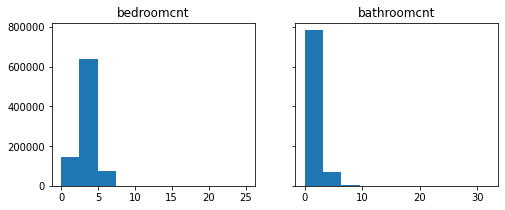

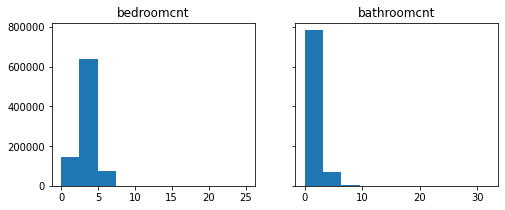

In [7]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(8,3), sharey=True)
ax1.hist(train.bedroomcnt)
ax1.set_title('bedroomcnt')
ax2.hist(train.bathroomcnt)
ax2.set_title('bathroomcnt')
# fig.show()
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(8,3), sharey=True)
ax1.hist(train.bedroomcnt)
ax1.set_title('bedroomcnt')
ax2.hist(train.bathroomcnt)
ax2.set_title('bathroomcnt')
# fig.show()

In [8]:
## Set up scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

min_max_scaler.fit(train[scalecols])
standard_scaler.fit(train[scalecols])
robust_scaler.fit(train[scalecols])

scalers = [
    min_max_scaler,
    standard_scaler,
    robust_scaler]

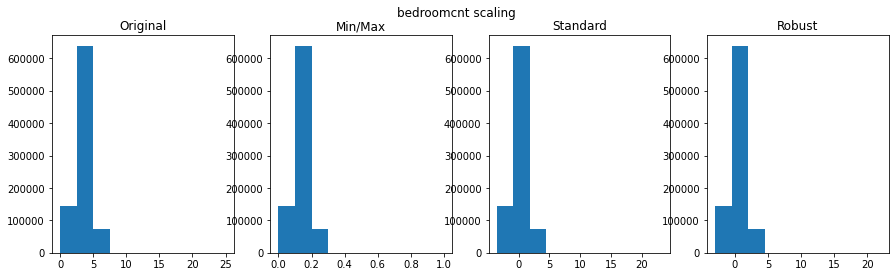

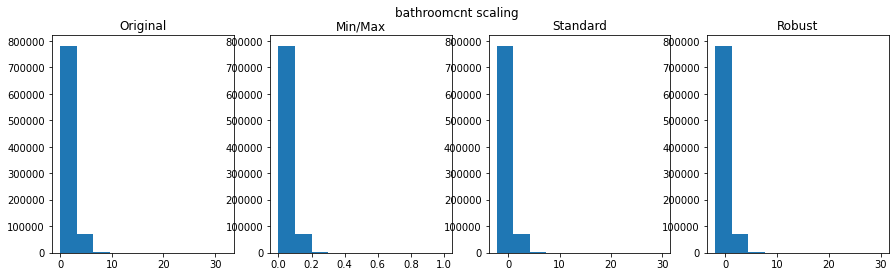

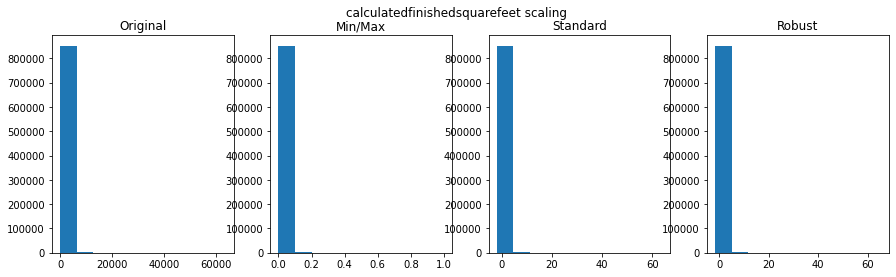

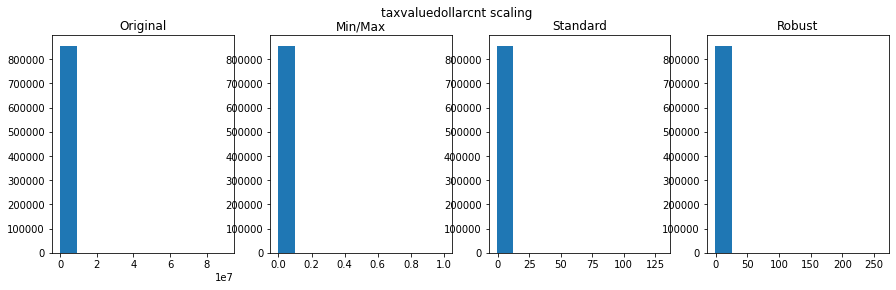

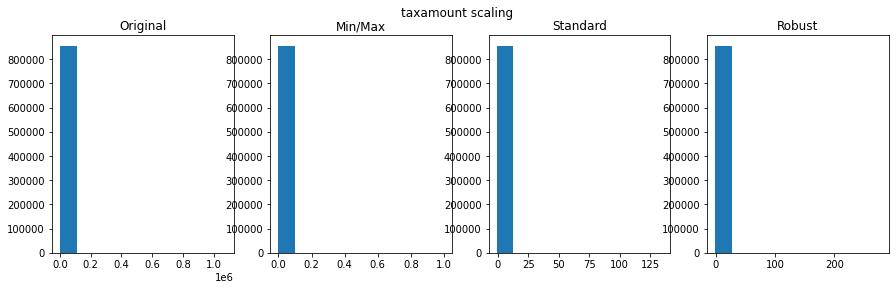

In [14]:
mtrain = train.copy()
mtrain[scalecols] = min_max_scaler.transform(mtrain[scalecols])

strain = train.copy()
strain[scalecols] = standard_scaler.transform(strain[scalecols])

rtrain = train.copy()
rtrain[scalecols] = robust_scaler.transform(rtrain[scalecols])


for col in train[scalecols]:

    fig, axs = plt.subplots(1, 4, figsize=(15, 4))
    fig.suptitle(f'{col} scaling')
    # Original distribution
    axs[0].hist(train[col])
    axs[0].set_title('Original')
    # Min Max
    axs[1].hist(mtrain[col])
    axs[1].set_title('Min/Max')
    # Standard
    axs[2].hist(strain[col])
    axs[2].set_title('Standard')
    # Robust
    axs[3].hist(rtrain[col])
    axs[3].set_title('Robust')

    


In [10]:
train.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1219155,1688919,3,1.0,996,28116,1955,1030.01,6037
543342,752594,2,1.0,983,232817,1928,3284.02,6037
1635508,2264423,4,2.0,1422,579000,1965,6054.78,6059
1723313,2387073,3,2.5,1714,297912,1997,3637.92,6111
1100678,1524533,3,2.0,1385,124672,1984,1731.01,6037


Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [15]:
mtrain[scalecols] = min_max_scaler.inverse_transform(mtrain[scalecols])
mtrain.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1219155,1688919,3.0,1.0,996.0,28116.0,1955,1030.01,6037
543342,752594,2.0,1.0,983.0,232817.0,1928,3284.02,6037
1635508,2264423,4.0,2.0,1422.0,579000.0,1965,6054.78,6059
1723313,2387073,3.0,2.5,1714.0,297912.0,1997,3637.92,6111
1100678,1524533,3.0,2.0,1385.0,124672.0,1984,1731.01,6037


Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


In [16]:
from sklearn.preprocessing import QuantileTransformer

quantile_scaler = QuantileTransformer(output_distribution='normal')
quantile_scaler.fit(train[scalecols])

qtrain = train.copy()
qtrain[scalecols] = quantile_scaler.transform(qtrain[scalecols])


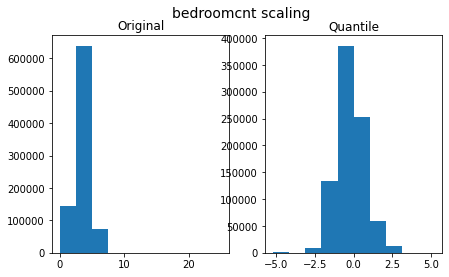

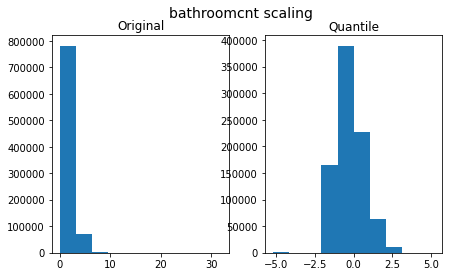

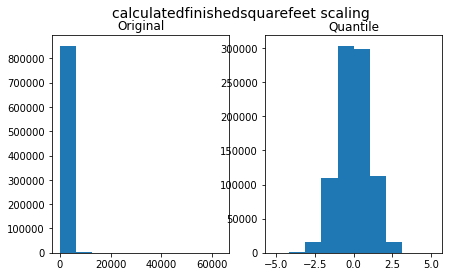

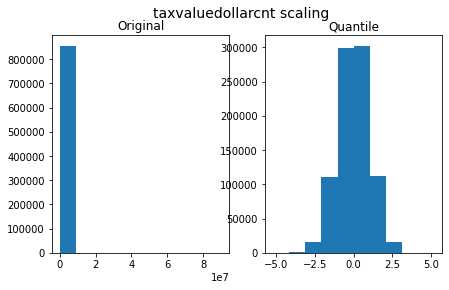

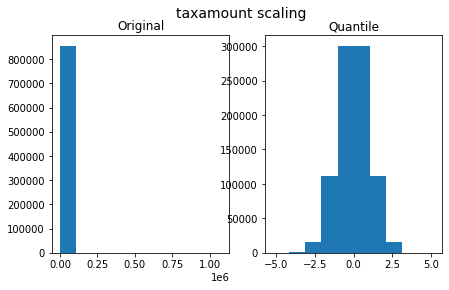

In [18]:
for col in train[scalecols]:

    fig, axs = plt.subplots(1, 2, figsize=(7, 4))
    fig.suptitle(f'{col} scaling', fontsize=14)
    # Original distribution
    axs[0].hist(train[col])
    axs[0].set_title('Original')
    # Min Max
    axs[1].hist(qtrain[col])
    axs[1].set_title('Quantile')

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


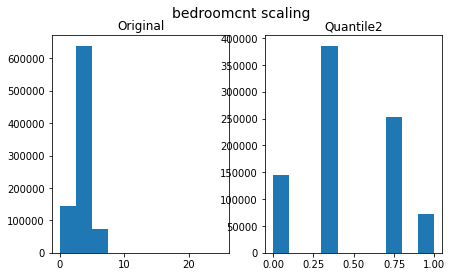

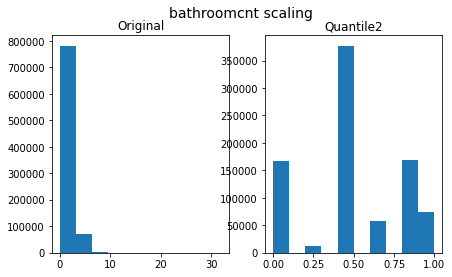

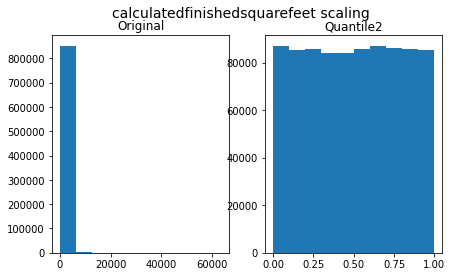

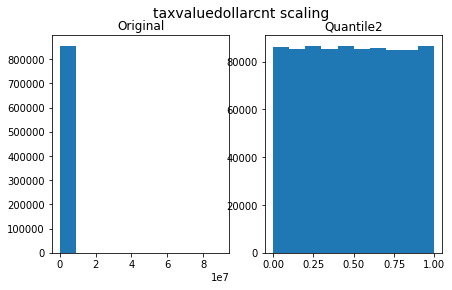

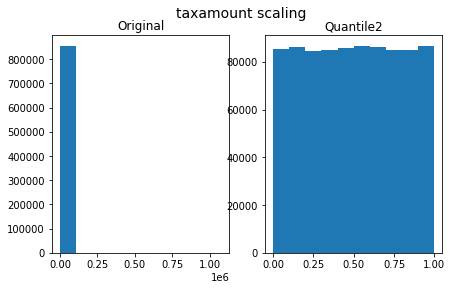

In [19]:
quantile_scaler2 = QuantileTransformer()
quantile_scaler2.fit(train[scalecols])

qqtrain = train.copy()
qqtrain[scalecols] = quantile_scaler2.transform(qqtrain[scalecols])

for col in train[scalecols]:

    fig, axs = plt.subplots(1, 2, figsize=(7, 4))
    fig.suptitle(f'{col} scaling', fontsize=14)
    # Original distribution
    axs[0].hist(train[col])
    axs[0].set_title('Original')
    # Min Max
    axs[1].hist(qqtrain[col])
    axs[1].set_title('Quantile2')

In [ ]:
## The default "uniform" distribution is used

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [20]:
# Because of heavy presence of outliers, I want to use quantile scaling.

def scale_zillow(train, test, validate):
    """Takes 3 (zillow) dataframes, trains a quantile scaler on the first, then transforms them all to fit a normal distribution."""
    # Define the columns to be scaled
    scalecols = [   'bedroomcnt',
                    'bathroomcnt',
                    'calculatedfinishedsquarefeet',
                    'taxvaluedollarcnt',
                    'taxamount']
    # Create and fit the model to the train sample set
    from sklearn.preprocessing import QuantileTransformer
    scaler = QuantileTransformer(output_distribution='normal')
    scaler.fit(train[scalecols])
    # Transform each sample set
    train[scalecols] = scaler.transform(train[scalecols])
    test[scalecols] = scaler.transform(test[scalecols])
    validate[scalecols] = scaler.transform(validate[scalecols])
    # Return
    return train, test, validate

In [23]:
# test
train, test, validate = wrangle.wrangle_zillow()
train, test, validate = scale_zillow(train,test,validate)